# 1. Statistical Hypothesis - what is it?

- Its a **statement/assumption** about a parameter


- As data scientists we want to test whether a certain hypothesis is true/false - using probability and statistics


- So, in **statistical testing**, there can be **two types of hypothesis**:

  1. **null hypothesis** (H<sub>0</sub>) - represent default assumption
  2. **alternative hypothesis** (H<sub>1</sub> or H<sub>a</sub>) - the contradictory statement where reasearcher is interested in.

 
- In hypothesis testing, **goal is to assess evidence against null hypothesis** using sample data - how?
  1. First, collect data
  2. Calculate test statistic based on sample data
  3. Then compare test statistic with critical value / p-value to make decision


- There are **two possible outcomes** of hypothesis testing:

  1. **Failed to reject the null hypothesis**: The evidence is not strong enough to reject the null hypothesis.
  2. **Reject the null hypothesis**: The evidence is strong enough to reject the null hypothesis in favor of the alternative hypothesis.

- Statistical hypothesis testing does not prove that a hypothesis is true. Instead, it provides evidence to support or reject a hypothesis based on the observed data.


- Common **statistical tests** used in hypothesis testing -
  1. t-test,
  2. chi-square test,
  3. ANOVA (analysis of variance),
  4. Regression analysis etc.
  - The choice of test depends on the nature of data and research question being investigated.
 

# 2. Statistical testing: Flipping a Coin Example

- Testing goal - whether the coin is fair?

- Our null hypothesis ($H_0$) is: Coin is fair with $p=0.5$ (probability of landing heads).

- Our alternative hypothesis ($H_1$) is: Coin is not fair with $p \neq 0.5$.

- For experiment, we will flip a coin $n$ number of times and count the heads. Its a **Bernoulli trial** and $X$ is sum of outcomes= counts of head, will be a **Binomial RV**.

- So, let's approximate the bernoulli trial with given $n$ and $p$ to find Standard deviation($\sigma$) and mean($\mu$).


## (a) Mean & SD of Binomial Normal Approximation

- For this binomial distribution of $n$ trials and probability of success $p$ for each trial:
  - Each trial contributes p probability of success.
  - So, total expetcted value **(mean)** of success becomes = **$n*p$**
  - Similarily, the **variance** of all trials adds up to give total variance (variables are independent and identically distributed (iid) in Bernoulli trials)
  
    $Var(X) = Var(X_1)+Var(X_2)...+Var(X_n)$.  (this is total variance of $n$ Bernoulli trials, therefore not divided by n)

    Where, Var(X_i)? It's $E(X_i^2)-E(X_i)^2$. 

  Because $X_i$ is either 1 or 0, thus $X_i^2$ is also same. Therefore, $E(X_i)=E(X_i^2)$. Thus Var(X_i) becomes $E(X_i)-E(X_i)^2$. 
  This gives $Var(X) = n*E(X_i)(1-E(X_i)) =$ **$n*p*(1-p)$**

In [2]:
from typing import Tuple  #to get mean and SD in a tuple
import math               #to find sqrt in eqn

def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
    """returns mu and sigma corresponding to binomial(n,p)"""
    mu = n*p
    sigma = math.sqrt(n*p*(1-p))
    return (mu, sigma)

normal_approximation_to_binomial(100,0.5)    

(50.0, 5.0)

## (b) Finding probability below/above/between threshold RV value/s
- Whenever a RV follows a normal distribution, we use **normal_CDF** to find probability within/outside any interval.
- We have seen in Proability chapter, CDF at particular point directly gives cumulative proability below that point i.e. CDF(X) = P(X<=x).
- Let's define functions to find probability of getting a values above, below and in between two points 'lo' and 'hi'.

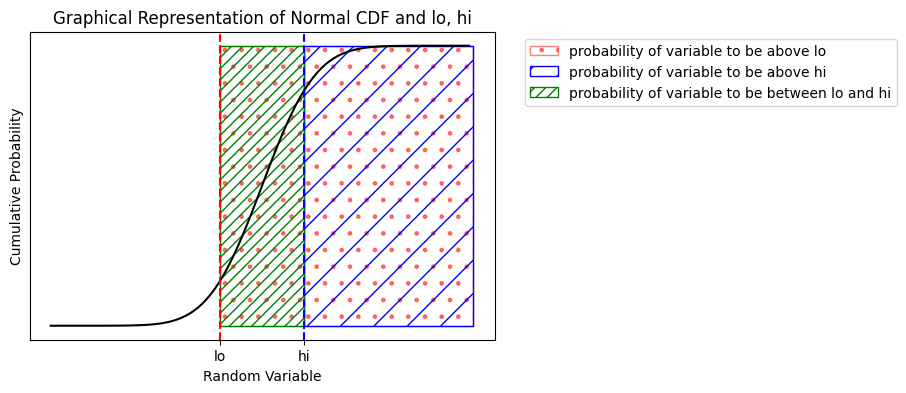

In [3]:
from scratch.probability import normal_CDF

from matplotlib import pyplot as plt
# import seaborn as sbn; sbn.set_theme()

plt.figure(figsize=(6,4))

xs = [x/10 for x in range(-50, 50)]
ys = [normal_CDF(x) for x in xs]
plt.plot(xs, ys, c='black')
plt.axvline(-1, linestyle='--', c='red')
plt.axvline(1, linestyle='--', c='b')
plt.xticks([-1, 1],['lo', 'hi'])
plt.yticks([])
plt.fill_between([-1,5], [1],color='none', hatch='.',edgecolor='r', alpha=0.5,label='probability of variable to be above lo')
plt.fill_between([1,5], [1], color='none', hatch='/',edgecolor='blue', label='probability of variable to be above hi')
plt.fill_between([-1,1], [1], color='none', hatch='///',edgecolor='green', label='probability of variable to be between lo and hi')

plt.xlabel('Random Variable')
plt.ylabel('Cumulative Probability')
plt.title('Graphical Representation of Normal CDF and lo, hi')
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1), fontsize=10)
plt.show()

In [4]:
from scratch.probability import normal_CDF

#normal CDF is probability for an event less than a threshold x
normal_probability_below = normal_CDF

#probability above threshold x
def normal_probability_above(lo: float,
                             mu: float=0,
                             sigma: float=1) -> float:
    "probability that an N(mu, sigma) > lo(threshold)"""
    return 1-normal_CDF(lo, mu, sigma)


#probability between lo and hi
def normal_probability_between(lo:float, hi:float, mu:float=0, sigma:float=1) -> float:
    """probability than an N(mu, sigma) is between lo and hi"""
    return normal_CDF(hi,mu,sigma) - normal_CDF(lo,mu,sigma)

#probability outside lo and hi
def normal_probability_outside(lo:float, hi:float, mu:float=0, sigma:float=1) -> float:
    """probability that an N(mu,sigma) is not between lo and hi"""
    return 1-normal_probability_between(lo,hi,mu,sigma)

## (c) Finding RV threshold for given probability
- using inverse_normal_cdf function from our probability module

In [5]:
from scratch import probability as pb

def normal_upper_bound(probability:float, 
                       mu:float=0,
                       sigma:float=1) -> float:
    """Returns z for which P(X<=z)=probability"""
    return pb.inverse_normal_cdf(probability,mu,sigma)


def normal_lower_bound(probability:float, 
                       mu:float=0,
                       sigma:float=1) -> float:
    """Returns z for which P(X>=z) = probability"""
    return pb.inverse_normal_cdf(1-probability,mu,sigma)

def normal_two_sided_bounds(probability:float, 
                           mu:float=0,
                           sigma:float=1) -> Tuple[float,float]:
    """returns symmetric bounds(around mean) that contains specified probability"""
    tail_probability = (1-probability)/2
    lower_bound = normal_upper_bound(tail_probability,mu,sigma)
    upper_bound = normal_lower_bound(tail_probability,mu,sigma)
    return (lower_bound,upper_bound)

print(normal_two_sided_bounds(0.95,500,15.8))

(469.0325870513916, 530.9674129486084)


- if our hypothesis of fairness is True, then for coin flips 1000 times, probability 0.5, will give mu=500 and sigma=15.8.
- Lets check:

In [6]:
mean,SD = normal_approximation_to_binomial(n = 1000, p = 0.5) 
assert 499<mean<501
assert 15.7<SD<15.9

## (d) Error types in hypothesis testing

Imagine we're trying to make a decision based on some data, and there are two possible situations:

- <u>Null Hypothesis ($H_0$) is True</u>
- <u>Null Hypothesis ($H_0$) is False</u>

However, based on our testing, the result can have 2 types of error -- **Type 1 Error** and **Type 2 Error**

### 1. Type 1 Error (False Positive): 

- We consider our hypothesis testing is postive ($H_1$) while in real its not.

- In other words, we incorrectly reject ($H_0$). 
  
- To control this type of error, we use a threshold called **Significance Level** ($\alpha$). This is used to decide if we should reject the null hypothesis or not.

- <u>Significance level is the **probability** of making a Type 1 error.</u> (i.e. rejecting $H_0$ when it is actually true.)

- Significance level is commonly taken as 5%, 1%, or 10%. 


In [7]:
# Mean and SD of binomial variable of a fair coin flipped 1000 times
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
assert mu_0 ==500, sigma_0 ==15.8

# We decide how much we are willing to make type 1 error i.e. Significance level
# Lets say H0 becomes false when it falls beyond (469,531 - centered around mean)

# Probability corresponding to bounds (469, 531)
p = normal_probability_between(469, 531, mu_0, sigma_0)  # 0.95
lower_bound, upper_bound = normal_two_sided_bounds(p,mu_0,sigma_0) 
print(f"{lower_bound=} and {upper_bound=}")
print(f"probability of values to lie between lower and upper bound = {round(p,2)}")

lower_bound=469.00001274272364 and upper_bound=530.9999872572763
probability of values to lie between lower and upper bound = 0.95


- In above example, for a fair coin with p = 0.5, the mean is 500 and standard deviation is 15.8. 
- The probability of variables to lie in range of 469 to 531 is 95%.
- Or we can say that, 95% of times the values of Binomial RV will fall within the range of 469 to 531.
- Means 5% of times the values go beyond range 469 to 531.
- Means when we say 5% significance level, we say that there is 5% chance of type 1 error.
- The significance level is chosen based on the acceptable risk of making a Type I error. 
- A lower significance level (e.g., 1%) reduces the risk of a Type I error but increases the risk of a Type II error (failing to reject the null hypothesis when it is false). 
- Whereas, a higher significance level (e.g., 10%) increases the risk of a Type I error but reduces the risk of a Type II error.


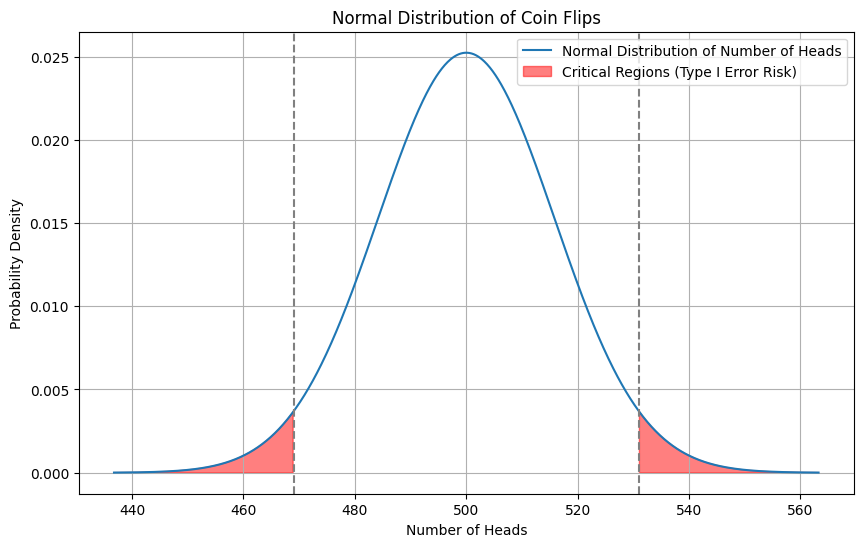

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
n = 1000  # number of coin flips
p = 0.5   # probability of heads
mean = n * p
std_dev = np.sqrt(n * p * (1 - p))
alpha = 0.05

# Create range of values for number of heads
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)
y = norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution of Number of Heads')
plt.fill_between(x, y, where=(x < mean - 1.96 * std_dev) | (x > mean + 1.96 * std_dev), color='red', alpha=0.5, label='Critical Regions (Type I Error Risk)')
plt.axvline(mean - 1.96 * std_dev, color='gray', linestyle='--')
plt.axvline(mean + 1.96 * std_dev, color='gray', linestyle='--')
plt.title('Normal Distribution of Coin Flips')
plt.xlabel('Number of Heads')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


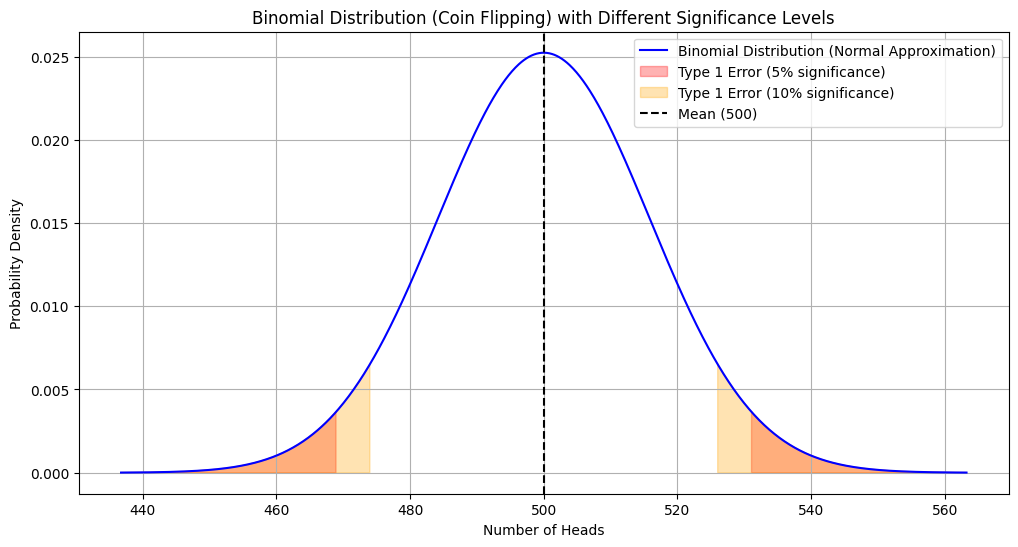

''

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# Parameters
n = 1000  # number of trials (flips)
p = 0.5   # probability of success (fair coin)
mu = n * p  # mean of the binomial distribution
sigma = np.sqrt(n * p * (1 - p))  # standard deviation of the binomial distribution

# Significance levels
alpha_5 = 0.05  # 5% significance level
alpha_10 = 0.10  # 10% significance level

# Critical values for significance levels
z_5 = norm.ppf(1 - alpha_5 / 2)  # two-tailed test, 5%
z_10 = norm.ppf(1 - alpha_10 / 2)  # two-tailed test, 10%

# Bounds for significance levels
bound_5 = z_5 * sigma
bound_10 = z_10 * sigma

# Plotting the binomial distribution as a normal approximation
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Binomial Distribution (Normal Approximation)', color='blue')

# Shading areas for significance levels
plt.fill_between(x, 0, y, where=(x <= mu - bound_5) | (x >= mu + bound_5), color='red', alpha=0.3, label='Type 1 Error (5% significance)')
plt.fill_between(x, 0, y, where=(x <= mu - bound_10) | (x >= mu + bound_10), color='orange', alpha=0.3, label='Type 1 Error (10% significance)')

# Labels and titles
plt.axvline(mu, color='black', linestyle='--', label='Mean (500)')
plt.xlabel('Number of Heads')
plt.ylabel('Probability Density')
plt.title('Binomial Distribution (Coin Flipping) with Different Significance Levels')
plt.legend()
plt.grid(True)

plt.show()

### Type 2 Error (False Negative)
- When $H_0$ is false in real, but we reject $H_1$.
- So, lets consider the p = 0.55, slightly biased towards head.
- **Power of a test**: It is the probability that the test correctly rejects a null hypothesis which is actually false.


In [10]:
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0) # bounds based on H0 is true (p=0.5)
mu_1, sigma_1 = normal_approximation_to_binomial(1000,0.55)  #real mean and SD when H0 is false (p=0.55)

# We have failed to reject H0 because X is still between original interval(lo, hi) 
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)  # 0.1134

# Means probability of correctly rejecting a false null hypothesis -> power of testing
power = 1- type_2_probability  #0.887
power

0.8865480012953671

**What does the above values indicate?**

Our null hypothesis is that the coin is fair. And our alternative hypothesis is it is biased towards head. We calculated the type_2 probability which indicates, the probability that data will fall within H_0 limits, even if H_1 is true. This comes out to be 11.34%. If it was below 5%(presumed significance level $\alpha$ ), we could have rejected the null hypothesis. But here we can't. This is what is called False negetive, Type 2 Error.

**One-sided test**
- Imagine our null hypothesis H0 is = coin is not biased towards head (This means, it can be bias towards tail or can be fair)
- In such case we want one-sided test that rejects H0 when X>>500 and not reject when X<500
- So, 5% significance test involves finding the cutoff below which 95% of probability lies

In [11]:
# For a fair coin

hi = normal_upper_bound(0.95,mu_0, sigma_0) # 526 
type_2_probability = normal_probability_below(hi, mu_1, sigma_1)    
power = 1- type_2_probability    #0.9363  

# This is more powerful test beacuse it does not reject H0 when X is below 469 but rejects H0 when X is above 526
# More likely H1 will be true in this case

type_2_probability

0.06362051966928273

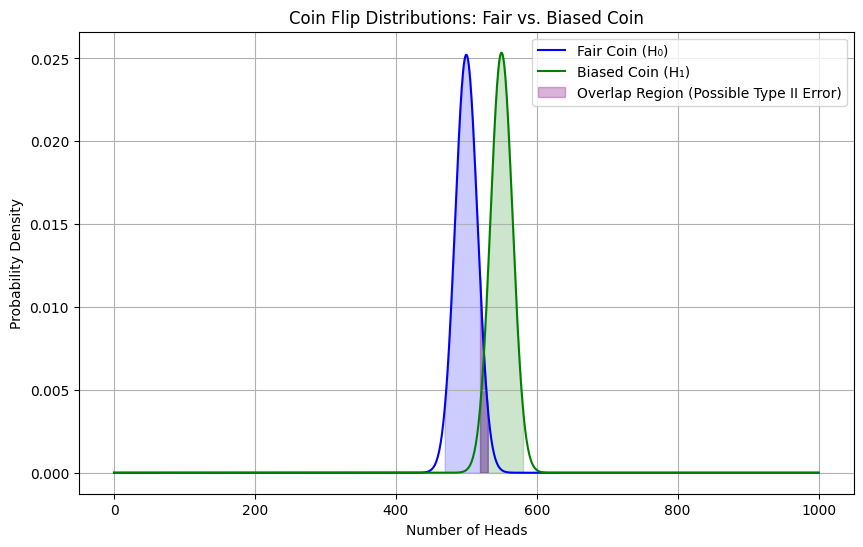

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the distributions
n_flips = 1000
p_fair = 0.5
p_biased = 0.55
mean_fair = n_flips * p_fair
mean_biased = n_flips * p_biased
std_dev_fair = np.sqrt(n_flips * p_fair * (1 - p_fair))
std_dev_biased = np.sqrt(n_flips * p_biased * (1 - p_biased))

# Generate x values
x = np.linspace(0, n_flips, 1000)

# Get the normal distributions
dist_fair = norm.pdf(x, mean_fair, std_dev_fair)
dist_biased = norm.pdf(x, mean_biased, std_dev_biased)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, dist_fair, color='blue', label='Fair Coin (H₀)')
plt.plot(x, dist_biased, color='green', label='Biased Coin (H₁)')
plt.fill_between(x, 0, dist_fair, where=(x >= mean_fair - 1.96*std_dev_fair) & (x <= mean_fair + 1.96*std_dev_fair), color='blue', alpha=0.2)
plt.fill_between(x, 0, dist_biased, where=(x >= mean_biased - 1.96*std_dev_biased) & (x <= mean_biased + 1.96*std_dev_biased), color='green', alpha=0.2)

# Highlight the overlap region
overlap_start = max(mean_fair - 1.96*std_dev_fair, mean_biased - 1.96*std_dev_biased)
overlap_end = min(mean_fair + 1.96*std_dev_fair, mean_biased + 1.96*std_dev_biased)
plt.fill_between(x, 0, dist_fair, where=(x >= overlap_start) & (x <= overlap_end), color='purple', alpha=0.3, label='Overlap Region (Possible Type II Error)')

# Labels and title
plt.xlabel('Number of Heads')
plt.ylabel('Probability Density')
plt.title('Coin Flip Distributions: Fair vs. Biased Coin')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


# 3. p-values

- p-value is the proability of observing <u>as extreme as or more extreme</u>  than the observed value of a null hypotheis.
- when (p-value) < (significance level, $\alpha$) => reject H0
- when (p-value) > (significance level, $\alpha$) => reject H1

Let's understand with the example of two-sided coin.

- Flipping a coin 1000 times, got 550 times head
- H0 = coin is fair, H1 = coin is not fair
- p-value is calculated using one of hypothesis testing method like t-test
- p-value measures the chances of observing X>=550 randomly, considering H0=true'
- if p-value is large means its ok if we observe extreme values or more than extreme values in a fair coin (i.e. H0 remains true)
- if p-value is small means there is less chances of observing extreme values in a fair coin, it means the coin is not fair (H0 is false)
- To quantify this 'large' and 'small' p-values, we define a threshold($\alpha$) such that
  If p-value< $\alpha$ - REJECT H0
  If p-value> $\alpha$ - REJECT H1
- Common choices for $\alpha$ include 0.05, 0.01, or 0.10
- (e.g. p=0.03, α=0.05): suggests that the observed outcome is statistically significant at the 0.05 significance level, providing support for H1

​

In [13]:
#calculate p-value using 'two-sided test' methods

def two_sided_p_value(x: float, mu: float=0, sigma: float=1) -> float:
    """
    How likely are we to see a value at least as extreme as x (in either
    direction) if our values are from an N(mu, sigma)?
    """
    if x>=mu:
        # tail is all probability above x
        #doubled to take both sides of mean
        return 2*normal_probability_above(x, mu, sigma)
        # Why did we use a value of 529.5 rather than using 530? 
        # This is called a **continuity correction.  
        # It reflects the fact that normal_probability_between(529.5,530.5, mu_0, sigma_0) 
        # is a better estimate of the probability of seeing 530 heads than normal_probability_between(530, 531, mu_0, sigma_0) is.
    else:
        #if x<mean, tail is all below x
        #doubled to tak both sides of mean
        return 2*normal_probability_below(x, mu, sigma)

#for 530 heads in 1000 flips
assert two_sided_p_value(529.5, mu_0, sigma_0) > 0.05  #reject H1
# if 5% is our significance threshold, then this p-value (6.2%) proves H0 is true. 
# also, we calculated earlier, for 5% significance 469<x<531, so for 530 obviously H0 should be true
# H0 should be false for x>531, say 532. 
# lets calculate p-value for x=532, it should come less than 5%

assert two_sided_p_value(531.5, mu_0, sigma_0) <0.5 #reject H0

- it can be seen from following simulation

In [14]:
import random
from typing import List

random.seed(10)
extreme_value_count = 0

#simulate n flip of a coin
def coin_flip (n: int) -> List[int]:
    return[random.randint(0,1) for _ in range(n)]

#do 1000 trials of 1000 flips
#count total head in each trial
for _ in range(1000):
    num_heads = sum(coin_flip(1000))
    if num_heads >= 530 or num_heads <= 470:
        extreme_value_count +=1
 
assert extreme_value_count>51  # out of 1000 it is p>5%(alpha), therefore H0=True (coin is fair)


In [15]:
#if we saw 532 heads, then p would be
two_sided_p_value(531.5, mu_0, sigma_0)  #is less than 5%, so reject H0


0.046345287837786575

- Both the above block of codes are calculating the same. Its just different way of approaching statistics.
- Similarly, for a fair coin p-value for one-sided test (one-sided test) are simply:

In [16]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

#for a one-sided test if we saw 525 heads then p-value is
upper_p_value(524.5, mu_0, sigma_0)   #p>0.05 (0.061) means we would not reject Null

#if we saw 527 heads then p-value would be:
upper_p_value(526.5, mu_0, sigma_0)   #p<0.05 (0.046) thus we reject null

0.04686839508859242

<u>When to Use One-Sided Test</u>:
Use a one-sided test when you are specifically interested in a change or effect in one direction and not interested in the opposite direction.

<u>When to Use Two-Sided Test</u>:

Use a two-sided test when you are interested in whether there is a significant difference from a specific value, regardless of the direction.

**WARNING** : Make sure the data is roughly normally distributed before using normal_probability_above to compute p-values

# 4. Confidence intervals
- Its the third approach to find if our hypothesis is true/false
- Example: Suppose I have a fair coin (its the Null hypothesis), and now I want to find the probability of heads.
- I will flip coins 1000 times and see how many times head pops up
- Assume we observed 525 heads, then from CLT on binomial distribution p = 0.525 and mean = p and SD = sqrt(p*(1-p)*1000)
- To find that our assumption of fair coin is correct or not, where in experiment we observed 525 heads, we will find bound values X for p=0.525.
- If X will lie between our predefined threshold of "95% confident", we will consider H0 true else false 

In [17]:
n=1000
p_hat = 0.525
mu = n*p_hat                               #525
sigma = math.sqrt(p_hat*(1-p_hat)*n)       #15.791

#find corresponding X bounds
print(normal_two_sided_bounds(0.95, mu, sigma))

(494.04902781290957, 555.9509721870904)


- in the above mean of fair coin (=500) lies between the confidence interval 494-555, the null hypothesis is not rejected
- and we will not say that coin is unfair
- Let us assume we observe 540 head sums

In [18]:
n =1000
p_hat = 0.54
mu = n*p_hat #540
sigma = math.sqrt(mu*(1-p_hat)) #15.76

print(normal_two_sided_bounds(0.95, mu, sigma))
#mean of fair coin(=500) lies outside the confidence interval
#thus reject H0


(509.10959272959184, 570.8904072704082)


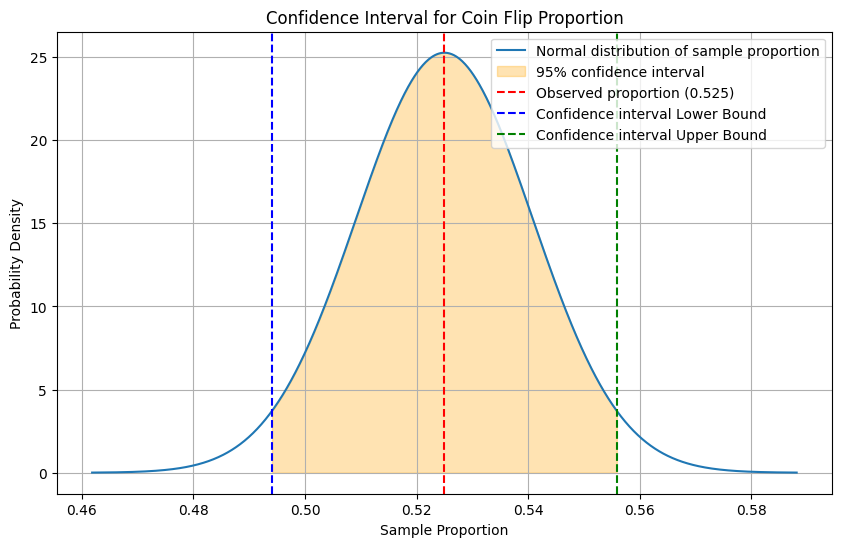

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Parameters
p_hat = 0.525
sigma = np.sqrt(p_hat * (1 - p_hat) / 1000)
z = 1.96
ci_lower = p_hat - z * sigma
ci_upper = p_hat + z * sigma

# Normal distribution
x = np.linspace(p_hat - 4*sigma, p_hat + 4*sigma, 1000)
y = stats.norm.pdf(x, p_hat, sigma)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal distribution of sample proportion')
plt.fill_between(x, y, where=(x >= ci_lower) & (x <= ci_upper), color='orange', alpha=0.3, label='95% confidence interval')
plt.axvline(x=p_hat, color='red', linestyle='--', label='Observed proportion (0.525)')
plt.axvline(x=ci_lower, color='blue', linestyle='--', label='Confidence interval Lower Bound')
plt.axvline(x=ci_upper, color='green', linestyle='--', label='Confidence interval Upper Bound')

plt.title('Confidence Interval for Coin Flip Proportion')
plt.xlabel('Sample Proportion')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


# 5. p-hacking
- practice of manipulating various aspects of statistical data analysis to obtain p-value under predefined significant level (normally 0.05)

- manipulating by means of choice of variables, the exclusion or inclusion of data points, and the use of different statistical tests

- For example, we flip a coin 1000 times to find fairness. And to find p-value we perform the same experiment k number of times.

- k is such that, until we get p-value < significant level (so that we can reject null hypothesis)


In [15]:
from typing import List
import random


def run_experiment() -> List[bool]:
    """flips a fair coin 1000 times. True = heads, False = tails"""
    return (random.random()< 0.5 for _ in range(1000))   #generate list of true/false for 1000 coin flips

random.seed(0)


def reject_fairness(exp: List[bool]) -> bool:
    """using the 5% significance levels """
    num_heads = len([flip for flip in exp if flip])
    return num_heads<469 or num_heads>531   #returns true/false

random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([exp for exp in experiments
                      if reject_fairness(exp)]) 
#for each exp checks the fairness condition, if num of heads is out of range means reject_fairness=True. 
#such way, it creates a list of True only
#its count gives total exps that gave head counts out of range

assert num_rejections == 46
    


- What this means is that if you’re setting out to find “significant” results, you usually can.
- Test enough hypotheses against your dataset, and one of them will almost certainly appear significant.
- Remove the right outliers, and you can probably get your p-value below 0.05.
- called **p-hacking**

  what to do?
- First clean your data without the hypotheses in mind
- and should keep in mind that p-values are not substitutes for common sense

# 6. Running an A/B test

- We want to find that which drink ad users **click** most, shown randomly when they visit a website.
- ad A : "tastes great"
- ad B : "less bias"
- if number of people seen the ad A = N<sub>A</sub> 
- number of people click the ad A = n<sub>A</sub>
- each ad view can be clicked or not clicked thus its a bernoulli trial with probability p<sub>A</sub>
- if $N_A$ is large, n<sub>A</sub>/N<sub>A</sub> tends to be normal distribution with mean = p_A and SD = $\sqrt{(p_A*(1- p_A)/N_A}$
- $N_A$ is divided instead of multiplying, to get mean and SD per-view basis.
- in code we are doing it for all N trials


In [16]:
from typing import Tuple
import math

def estimated_parameters(N: int, n: int) -> Tuple[float, float]:
    p = n/N
    return N*p, math.sqrt(p*(1-p)*N)


- Assume for ads A and B the normals are independent, then the difference of normals will also be normal with:  
  mean = $p_A$ - $p_B$  
  SD = $\sqrt{\sigma_A^2 + \sigma_B^2}$

- This is sort of cheating. The math only works out exactly like this if you know the standard deviations. Here we’re estimating them from the data, which means that we really should be using a t-distribution. But for large enough datasets, it’s close enough that it doesn’t make much of a difference.

In [17]:
def a_b_test_statistic(N_A: int, n_A: int, N_B: int, n_B: int) -> float:
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

z = a_b_test_statistic(1000, 200, 1000, 180)
print(z)

-1.1403464899034461


- we assumed A and B are independent and should have equal mean but we can see the difference is large

In [18]:
two_sided_p_value(z)

0.25414197654223647

- 0.25 probability shows that there is large chance of getting extreme value Z or greater.
- thus we can't conclude that there is not much difference.
- what if ad B gets only 50 clicks?

In [19]:
z = a_b_test_statistic(1000, 200, 1000, 150)
two_sided_p_value(z)

0.003189699706216853

- 0.0031 probability shows its very less chance that difference will exceed z.
- thus we can say that we can ignore this difference

# 7. Bayesian Inference
- Above all procedures involved making probability statements like - There’s only a 3% chance we will observe such an extreme statistic if our null hypothesis were true.
  
- In Bayesian Inference, we treat unknown parameters themselves as RVs
  
- We start with a **prior distribution** for the parameters and then use the observed data and Bayes’s theorem to get an updated **posterior distribution** for the parameters.
  
- Rather than making probability judgments about the tests, we make **probability judgments about the parameters**.
  
- Bayesian inference allows us to update our beliefs or probabilities based on observed evidence, leading to more informed decisions and predictions. 
  

## Beta distribution
- Beta distribution is widely used in Bayesian statistics as a prior distribution for modeling RV that represent probabilities, proportions, or rates
- The Beta distribution has two shape parameters, denoted by $\alpha$ and $\beta$ which determine the shape of the distribution.
- The probability density function (PDF) of the Beta distribution is given by the following formula:
$$ f(x; \alpha, \beta) = \frac{x^{(\alpha - 1)} (1-x)^{(\beta-1)}}{B(\alpha, \beta)} $$ 

where,  x : random variable representing a value between 0 and 1.  
        $\alpha$ and $\beta$ are shape parameters, both greater than zero.  
        **B($\alpha$, $\beta$) is the Beta function**, a normalization constant that ensures the total area under the curve is equal to 1.

 **Beta function is given as**: $$ B(\alpha, \beta) = \frac{\Gamma{\alpha} \Gamma{\beta}}{\Gamma(\alpha+\beta)}$$

 **gamma function $\Gamma$ is factorial of non-integer numbers, e.g. $\Gamma X = factorial (X-1)$

In [20]:
def B(alpha: float, beta: float) -> float:
    """A normalizing constant so that the total probability is 1"""
    return math.gamma(alpha)*math.gamma(beta)/math.gamma(alpha+beta)

In [21]:
from matplotlib import pyplot as plt
import seaborn as sbn; sbn.set_theme()
import random

def beta_pdf(x: float, alpha: float, beta: float) -> float:
    if x<=0 or x>=1:
        return 0
    else:
        return x**(alpha-1) * (1-x)**(beta-1) / B(alpha, beta)


- the beta distribution centres its weight at $\alpha$/$(\alpha+\beta)$
- for alpha=beta=1 beta distribution is a uniform dostribution
- if $\alpha>>\beta$ : most weight will be near 1 and vice-versa


In [22]:
x_values = [x/100 for x in range(100)]

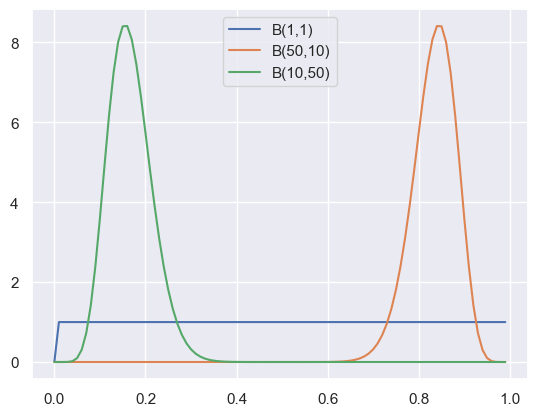

In [23]:
plt.plot([x/100 for x in range(100)] , [beta_pdf(i,1,1) for i in x_values], label = 'B(1,1)')
plt.plot([x/100 for x in range(100)] , [beta_pdf(i,50,10) for i in x_values],label = 'B(50,10)') #alpha>>beta
plt.plot([x/100 for x in range(100)] , [beta_pdf(i,10,50) for i in x_values],label = 'B(10,50)') #alpha<<beta
plt.legend()


## Prior distribution and Posterior distribution

**prior distribution on p**
- Maybe we don’t want to take a stand on whether the coin is fair, and we choose alpha and beta to both
equal 1.
- Or maybe we have a strong belief that the coin lands heads 55% of the time, and we choose alpha equals 55, beta equals 45.
- Then we flip our coin a bunch of times and see $h$ heads and $t$ tails.
  
**Posterior distribution**
- Bayes’s theorem (and some mathematics too tedious for us to go through here) tells us that the posterior distribution for p is again a Beta distribution, but with parameters $\alpha + h$ and $\beta + t$.

- It is no coincidence that the posterior distribution was again a Beta distribution. The number of heads is given by a Binomial distribution, and the Beta is the **conjugate prior** to the Binomial distribution. This means that whenever we update a Beta prior using observations from the corresponding binomial, we will get back a Beta posterior.

**Example**
1. Let’s say we flip the coin 10 times and see only 3 heads.
- If we started with the uniform prior (in some sense refusing to take a stand about the coin’s fairness), our posterior distribution would be a Beta(4, 8), centered around 0.33.
- Since we considered all probabilities equally likely, our best guess is close to the observed probability.
2. If we started with a Beta(20, 20) (expressing a belief that the coin was roughly fair), our posterior distribution would be a Beta(23, 27), centered around 0.46, indicating a revised belief that maybe the coin is slightly biased toward tails.
3. And if we started with a Beta(30, 10) (expressing a belief that the coin was biased to flip 75% heads), our posterior distribution would be a Beta(33,17), centered around 0.66.
- In that case we’d still believe in a heads bias, but less strongly than we did initially. 

In [24]:
x_values = [x/100 for x in range(100)]

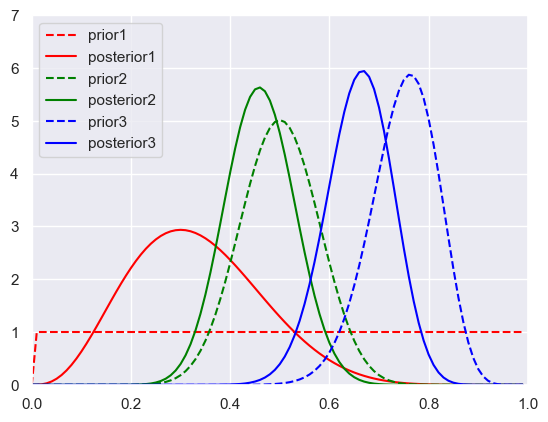

In [25]:
#priors and posteriors arising from EX 1

plt.plot([x/100 for x in range(100)], [beta_pdf(i,1,1) for i in x_values],'--',color ='red',label = 'prior1')
plt.plot([x/100 for x in range(100)], [beta_pdf(i,4,8) for i in x_values], color ='red',label = 'posterior1')

plt.plot([x/100 for x in range(100)], [beta_pdf(i,20,20) for i in x_values],'--',color ='green',label = 'prior2')
plt.plot([x/100 for x in range(100)], [beta_pdf(i,23,27) for i in x_values], color ='green',label = 'posterior2')

plt.plot([x/100 for x in range(100)], [beta_pdf(i,30,10) for i in x_values],'--',color ='blue',label = 'prior3')
plt.plot([x/100 for x in range(100)], [beta_pdf(i,33,17) for i in x_values], color ='blue',label = 'posterior3')

plt.xlim(0, 1) 
plt.ylim(0, 7) 
plt.legend()

- If we flipped the coin more and more times, the prior would matter less and less until eventually we have (nearly) the same posterior distribution no matter which prior we started with.

- For example, no matter how biased we initially thought the coin was, it would be hard to maintain that belief after seeing 1,000 heads out of 2,000 flips (unless we are a lunatic who picks something like a Beta(1000000,1) prior).

- What’s interesting is that this allows us to make probability statements about hypotheses: “Based on the prior and the observed data, there is only a 5% likelihood the coin’s heads probability is between 49% and 51%.”

- This is philosophically very different from a statement like “If the coin were fair, we would expect to observe data so extreme only 5% of the time.”

- it is not used much due to its controversial nature that it is subjective to chose prior.

## P-values vs Bayesian Inference

Bayesian inference and p-values are two different approaches used in statistical analysis, each with its own methodology and interpretation.

1. **Bayesian Inference**:
   - In Bayesian inference, we update our beliefs about the parameters of interest (e.g., means, proportions, regression coefficients) based on observed data and prior knowledge.
   - We start with a prior distribution representing our initial beliefs about the parameters before observing any data.
   - We then update our beliefs using Bayes' theorem, which combines the prior distribution with the likelihood of the data to obtain the posterior distribution.
   - The posterior distribution represents our updated beliefs about the parameters after observing the data.
   - Bayesian inference provides a probabilistic framework for making inferences, allowing us to quantify uncertainty and make decisions based on the posterior distribution.

2. **p-values**:
   - p-values are used in frequentist statistics to assess the strength of evidence against a null hypothesis.
   - The null hypothesis typically represents a specific value or relationship that we want to test (e.g., the mean of a population is equal to a certain value).
   - The p-value measures the probability of observing the data (or more extreme data) if the null hypothesis were true.
   - A small p-value (usually less than a predefined threshold, such as 0.05) suggests that the observed data are unlikely under the null hypothesis, leading us to reject the null hypothesis in favor of an alternative hypothesis.
   - p-values do not provide direct information about the probability of hypotheses or parameter values; instead, they indicate the strength of evidence against the null hypothesis.

In summary, Bayesian inference allows us to update beliefs based on data and prior knowledge, while p-values provide a measure of evidence against a null hypothesis in frequentist statistics. Bayesian inference is more flexible and interpretable, especially for complex models and small sample sizes, but it requires specifying prior distributions and may be computationally intensive. P-values are simpler to compute but have limitations, such as not providing direct information about the probability of hypotheses or parameters.